In [35]:
#Importation de librairie
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Prepare Date

### Importation

In [3]:
def wrangle(filepath):
    # importation des données
    df = pd.read_csv(filepath)
    # elimination des valeurs aberantes au niveau de la variable person_age
    mask_age = df["person_age"]<100
    df = df[mask_age]
    # elimination des valeurs aberantes au niveau de la variable person_age person_income
    low, high = df["person_income"].quantile([0.0, 0.9])
    mask_person_income = df["person_income"].between(low, high)
    df = df[mask_person_income]
    return df

In [4]:
df = wrangle('credit_scorting_data/credit_risk_dataset.csv')
print(df.shape)
df.head()

(29322, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Split

In [5]:
target = "loan_status"
X = df.drop(columns=target)
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

In [7]:
print("X_train shape: ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape:  (23457, 11)
X_test shape :  (5865, 11)
y_train shape:  (23457,)
y_test shape :  (5865,)


## Build model

### Baseline

In [8]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Accuracy baseline : ", round(acc_baseline, 2))

Accuracy baseline :  0.77


###  Iterate

In [9]:
# Build model
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42)    
)

In [10]:
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['person_home_ownership', 'loan_intent',
                                      'loan_grade',
                                      'cb_person_default_on_file'],
                                mapping=[{'col': 'person_home_ownership',
                                          'data_type': dtype('O'),
                                          'mapping': RENT        1
OWN         2
MORTGAGE    3
OTHER       4
NaN        -2
dtype: int64},
                                         {'col': 'loan_intent',
                                          'data_type': dtype('O'),
                                          'mapping': MEDICAL              1
HOMEIMPROVEMENT      2
VENTURE              3
PERSONAL             4
DEBTCONSOLIDATION    5
EDUCATION            6
NaN                 -2
dtype: int64},
                                         {'col': 'loan_grade',
                                          'data_type': dtype('O'),
                                          'mapping': C      1
A      2
B      3
D      4
E      5
F      6
G      7
NaN   -2
dtype: int64},
                                         {'col': 'cb_person_default_on_file',
                                          'data_type': dtype('O'),
                                          'mapping': N      1
Y      2
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [11]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

In [12]:
print("Training accuracy :", round(acc_train, 2))
print("Validation accuracy:", round(acc_test, 2))

Training accuracy : 1.0
Validation accuracy: 0.88


In [13]:
tree_depth = model.named_steps['decisiontreeclassifier'].get_depth()
print("Tree depth:", tree_depth)

Tree depth: 28


In [14]:
depth_hyperparams = range(1, 50, 2)

In [15]:
# Creation d'une liste de train_accuracy et test_accuracy vide
training_accuracy = []
validation_accuracy = []
for d in depth_hyperparams:
    # Construction du model avec max_depth=d
    test_model = make_pipeline(OrdinalEncoder(), SimpleImputer(),DecisionTreeClassifier(max_depth=d, random_state=42))
    # Entrainement du model
    test_model.fit(X_train, y_train)
    # calcul du train acc et l'ajout a 'train_accuracy'
    training_accuracy.append(test_model.score(X_train, y_train))
    # calcul du val acc et l'ajout a 'test_accuracy'
    validation_accuracy.append(test_model.score(X_test, y_test))

print("Training accuracy: ", training_accuracy[:3])
print("Validation accuracy: ", validation_accuracy[:3])

Training accuracy:  [0.8204800272839664, 0.8872831137826661, 0.9101334356482074]
Validation accuracy:  [0.8226768968456948, 0.8859335038363171, 0.9098039215686274]


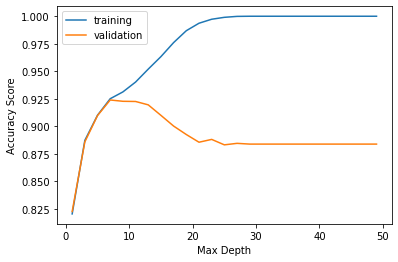

In [16]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_accuracy, label="training")
plt.plot(depth_hyperparams, validation_accuracy, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();


In [17]:
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth =6, random_state=42)    
)
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['person_home_ownership', 'loan_intent',
                                      'loan_grade',
                                      'cb_person_default_on_file'],
                                mapping=[{'col': 'person_home_ownership',
                                          'data_type': dtype('O'),
                                          'mapping': RENT        1
OWN         2
MORTGAGE    3
OTHER       4
NaN        -2
dtype: int64},
                                         {'col': 'loan_intent',
                                          'data_type': dtype('O'),
                                          'mapping': MEDICAL              1
HOMEIMPROVEMENT      2
VENTURE              3
PERSONAL             4
DEBTCONSOLIDATION    5
EDUCATION            6
NaN                 -2
dtype: int64},
                                         {'col': 'loan_grade',
                                          'data_type': dtype('O'),
                                          'mapping': C      1
A      2
B      3
D      4
E      5
F      6
G      7
NaN   -2
dtype: int64},
                                         {'col': 'cb_person_default_on_file',
                                          'data_type': dtype('O'),
                                          'mapping': N      1
Y      2
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [18]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

In [19]:
print("Training accuracy :", round(acc_train, 2))
print("Validation accuracy:", round(acc_test, 2))

Training accuracy : 0.92
Validation accuracy: 0.92


## Communicate

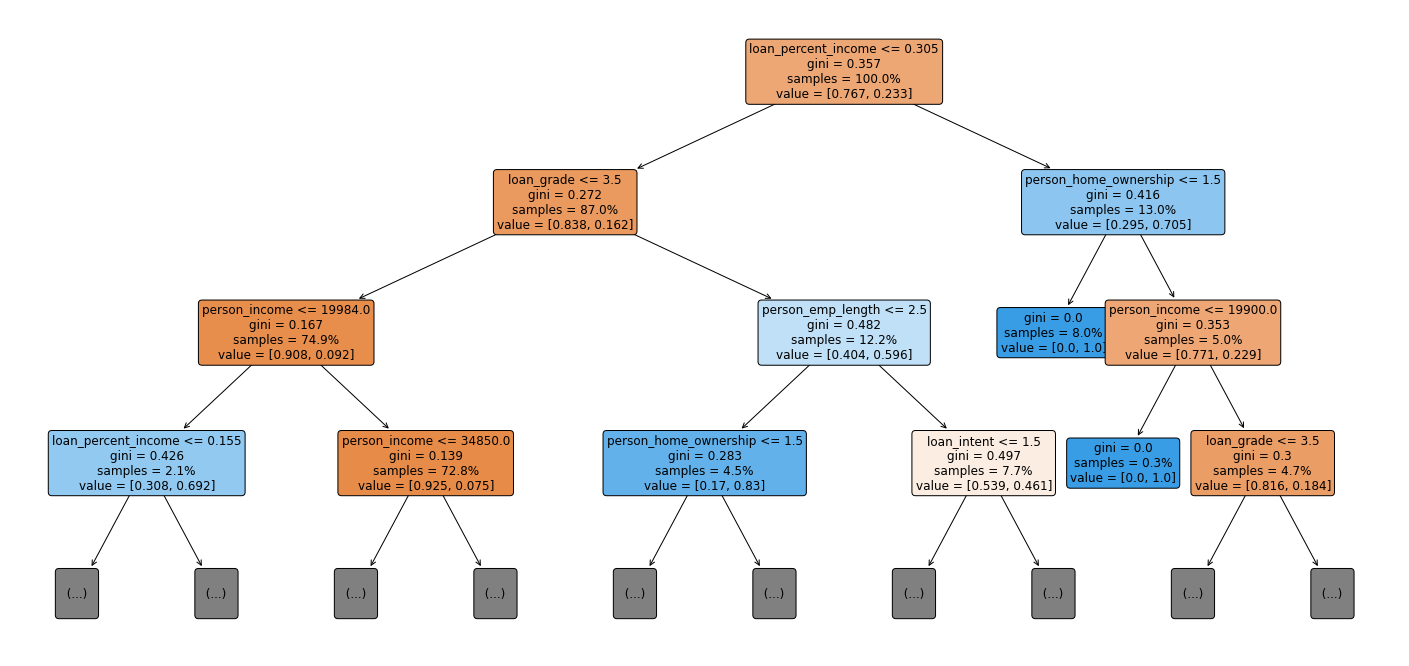

In [28]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(25, 12))
plot_tree(
    decision_tree= model.named_steps['decisiontreeclassifier'],
    feature_names= X_train.columns,
    filled = True,# Color leaf with class
    rounded=True, # Round leaf edges
    proportion=True,   # Display proportion of classes in leaf
    max_depth=3, # Only display first 3 levels
    fontsize=12, # Enlarge font
    ax=ax, # Place in figure axis
    
);

In [29]:
features = X_train.columns
importance = model.named_steps['decisiontreeclassifier'].feature_importances_
print("Features", features[:3])
print("Importances", importance[:3])

Features Index(['person_age', 'person_income', 'person_home_ownership'], dtype='object')
Importances [0.00075248 0.10319295 0.19640558]


In [32]:
feat_import = pd.Series(importance, index=features).sort_values()
feat_import

cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
loan_amnt                     0.000355
loan_int_rate                 0.000504
person_age                    0.000752
person_emp_length             0.034859
loan_intent                   0.086271
person_income                 0.103193
person_home_ownership         0.196406
loan_grade                    0.251829
loan_percent_income           0.325831
dtype: float64

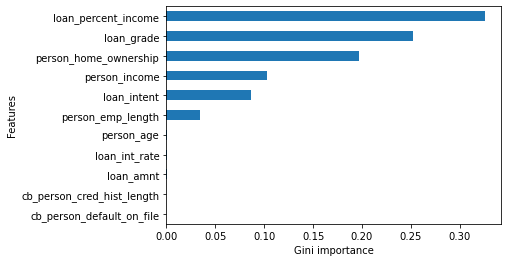

In [34]:
feat_import.plot(kind="barh")
plt.xlabel('Gini importance')
plt.ylabel('Features');

In [36]:
# Save model
with open('model-2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [37]:
with open('model-2.pkl', 'rb') as f:
    load_model = pickle.load(f)
print(load_model)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['person_home_ownership', 'loan_intent',
                                      'loan_grade',
                                      'cb_person_default_on_file'],
                                mapping=[{'col': 'person_home_ownership',
                                          'data_type': dtype('O'),
                                          'mapping': RENT        1
OWN         2
MORTGAGE    3
OTHER       4
NaN        -2
dtype: int64},
                                         {'col': 'loan_intent',
                                          'data_type': dtype('O'),
                                          'mapping': MEDICAL              1
HOMEIMPROVEMENT      2
VENTURE              3
PERSONAL             4
DEBTCONSOLIDATION    5
EDUCATION            6
NaN                 -2
dtype: int64},
                                         {'col': 'loan_grade',
                                          'data_type': dtype('O')